In [10]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 13 02:41:31 2018

@author: dhritiman
"""

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

x_train, train_labels = load_mnist('/Users/dhritiman/Documents/Documents - Dhritiman’s MacBook Pro/GitHub/fashion-mnist/data/fashion', kind='train')
x_test, test_labels = load_mnist('/Users/dhritiman/Documents/Documents - Dhritiman’s MacBook Pro/GitHub/fashion-mnist/data/fashion', kind='t10k')

x_train = x_train/255
x_test = x_test/255

In [11]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 128 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

In [12]:
import random

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    indices = random.sample(range(len(x_train)), batch_size)
    x_batch = x_train[indices]

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: x_batch})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.367796
Step 1000: Minibatch Loss: 0.073891
Step 2000: Minibatch Loss: 0.062136
Step 3000: Minibatch Loss: 0.054488
Step 4000: Minibatch Loss: 0.051918
Step 5000: Minibatch Loss: 0.052117
Step 6000: Minibatch Loss: 0.048067
Step 7000: Minibatch Loss: 0.045637
Step 8000: Minibatch Loss: 0.046468
Step 9000: Minibatch Loss: 0.044432
Step 10000: Minibatch Loss: 0.046809
Step 11000: Minibatch Loss: 0.044048
Step 12000: Minibatch Loss: 0.043174
Step 13000: Minibatch Loss: 0.042714
Step 14000: Minibatch Loss: 0.043143
Step 15000: Minibatch Loss: 0.045177
Step 16000: Minibatch Loss: 0.047363
Step 17000: Minibatch Loss: 0.041541
Step 18000: Minibatch Loss: 0.041820
Step 19000: Minibatch Loss: 0.041923
Step 20000: Minibatch Loss: 0.040870
Step 21000: Minibatch Loss: 0.041962
Step 22000: Minibatch Loss: 0.043298
Step 23000: Minibatch Loss: 0.040017
Step 24000: Minibatch Loss: 0.042937
Step 25000: Minibatch Loss: 0.038982
Step 26000: Minibatch Loss: 0.043166
Step 27000: Mi

Original Images


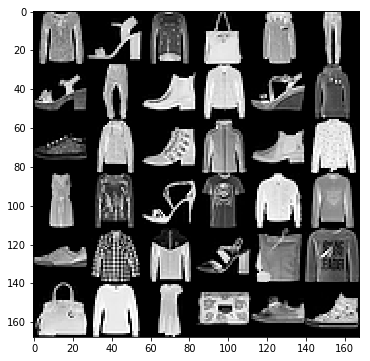

Reconstructed Images


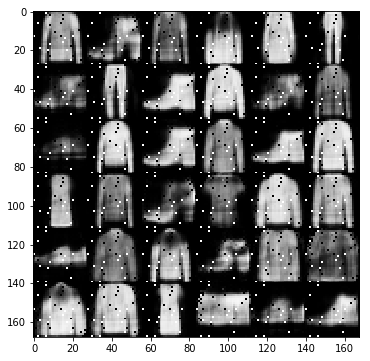

In [16]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    indices = random.sample(range(len(x_test)), batch_size)
    batch_x = x_test[indices]
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: x_train})
    f = sess.run(encoder_op, feed_dict={X: x_test})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

0.78269999999999995

In [25]:
model.fit(x_train, train_labels)
predictions = model.predict(x_test)
accuracy_score(test_labels, predictions)

0.84119999999999995

In [19]:
import K_means

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [20]:
K_means.kmeans_algo(x_train, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.42311666666666664 Gini: 0.602709558518
1
Purity: 0.4958 Gini: 0.582734659586
2
Purity: 0.52625 Gini: 0.584915556983
3
Purity: 0.5393666666666667 Gini: 0.588733515268
4
Purity: 0.5486 Gini: 0.573466651539
5
Purity: 0.5519333333333334 Gini: 0.559716088309
6
Purity: 0.5595333333333333 Gini: 0.553907806969
7
Purity: 0.5622333333333334 Gini: 0.544243299251
8
Purity: 0.5754833333333333 Gini: 0.524239582513
9
Purity: 0.5837166666666667 Gini: 0.511032919606
10
Purity: 0.5895833333333333 Gini: 0.5001318696
11
Purity: 0.59505 Gini: 0.489778356476
12
Purity: 0.59925 Gini: 0.478846328577
13
Purity: 0.5998833333333333 Gini: 0.470173902112
14
Purity: 0.5986 Gini: 0.464683646353
15
Purity: 0.5967166666666667 Gini: 0.461671352908
16
Purity: 0.5947833333333333 Gini: 0.460089828504
17
Purity: 0.5937833333333333 Gini: 0.46000571488
18
Purity: 0.5928 Gini: 0.460212276321
19
Purity: 0.59195 Gini: 0.460702654145
20
Purity: 0.5917 Gini: 0.460847042645
21
Purity: 0.5910833333333333 Gini: 0.4610636

In [22]:
K_means.kmeans_algo(x_test, test_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.4388 Gini: 0.539544627087
1
Purity: 0.4753 Gini: 0.53776664755
2
Purity: 0.5233 Gini: 0.511054705158
3
Purity: 0.5386 Gini: 0.48087914385
4
Purity: 0.5403 Gini: 0.470005202903
5
Purity: 0.538 Gini: 0.473220714301
6
Purity: 0.5358 Gini: 0.474449838964
7
Purity: 0.537 Gini: 0.47149460159
8
Purity: 0.5407 Gini: 0.469055557511
9
Purity: 0.5445 Gini: 0.467867223875
10
Purity: 0.5465 Gini: 0.467690291586
11
Purity: 0.5473 Gini: 0.466700782502
12
Purity: 0.549 Gini: 0.466608156031
13
Purity: 0.5497 Gini: 0.466315472672
14
Purity: 0.5509 Gini: 0.465922469162
15
Purity: 0.5518 Gini: 0.465601798842
16
Purity: 0.5515 Gini: 0.465747960883
17
Purity: 0.5515 Gini: 0.465773308887
18
Purity: 0.5518 Gini: 0.465637435392
19
Purity: 0.5523 Gini: 0.465432517497
20
Purity: 0.5522 Gini: 0.465534462806
21
Purity: 0.5523 Gini: 0.465578713533
22
Purity: 0.5524 Gini: 0.465522746233
23
Purity: 0.5524 Gini: 0.46552112092
24
Purity: 0.5524 Gini: 0.46552112092


In [23]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.4577 Gini: 0.635736760029
1
Purity: 0.5017833333333334 Gini: 0.565413448527
2
Purity: 0.5153166666666666 Gini: 0.554840556051
3
Purity: 0.5286 Gini: 0.549555717003
4
Purity: 0.5420833333333334 Gini: 0.540886101993
5
Purity: 0.5520666666666667 Gini: 0.533549234128
6
Purity: 0.5588833333333333 Gini: 0.527532969223
7
Purity: 0.5627666666666666 Gini: 0.524120133694
8
Purity: 0.56335 Gini: 0.523577406405
9
Purity: 0.5634166666666667 Gini: 0.521868596612
10
Purity: 0.56295 Gini: 0.519812343128
11
Purity: 0.5617333333333333 Gini: 0.520120501004
12
Purity: 0.5596 Gini: 0.522236302457
13
Purity: 0.5582833333333334 Gini: 0.523444748841
14
Purity: 0.5577166666666666 Gini: 0.523755852171
15
Purity: 0.5575 Gini: 0.523950670566
16
Purity: 0.5575333333333333 Gini: 0.523858451163
17
Purity: 0.5576166666666666 Gini: 0.523872823819
18
Purity: 0.5576666666666666 Gini: 0.523810323429
19
Purity: 0.5577166666666666 Gini: 0.523701985845
20
Purity: 0.5577166666666666 Gini: 0.523720985159
21
Purity

In [24]:
K_means.kmeans_algo(f, test_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.436 Gini: 0.662540410783
1
Purity: 0.4852 Gini: 0.622561096547
2
Purity: 0.5068 Gini: 0.596245769142
3
Purity: 0.5275 Gini: 0.574706087527
4
Purity: 0.5457 Gini: 0.559192904578
5
Purity: 0.5638 Gini: 0.548821737775
6
Purity: 0.5755 Gini: 0.541893056257
7
Purity: 0.5818 Gini: 0.537607414828
8
Purity: 0.5853 Gini: 0.535191674061
9
Purity: 0.5849 Gini: 0.532802736133
10
Purity: 0.5844 Gini: 0.528217118778
11
Purity: 0.5827 Gini: 0.521570508483
12
Purity: 0.5828 Gini: 0.515528045548
13
Purity: 0.5822 Gini: 0.512806616699
14
Purity: 0.5807 Gini: 0.510918022861
15
Purity: 0.58 Gini: 0.508150185228
16
Purity: 0.5793 Gini: 0.506043036591
17
Purity: 0.5797 Gini: 0.503721071958
18
Purity: 0.5795 Gini: 0.502514258009
19
Purity: 0.5792 Gini: 0.502003372234
20
Purity: 0.5794 Gini: 0.502010291204
21
Purity: 0.5795 Gini: 0.501996542838
22
Purity: 0.5795 Gini: 0.501996542838
